<a href="https://colab.research.google.com/github/yuktasarode/Breast-Cancer-Prediction/blob/main/BreastCancer_Prediciton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/sample_data/gbsg.csv')
display(df)

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


In [ ]:
df.shape

(686, 12)

In [ ]:
df.head()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null    int64
 6   nodes       686 non-null    int64
 7   pgr         686 non-null    int64
 8   er          686 non-null    int64
 9   hormon      686 non-null    int64
 10  rfstime     686 non-null    int64
 11  status      686 non-null    int64
dtypes: int64(12)
memory usage: 64.4 KB


In [ ]:
df.describe()

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,343.500000,966.061224,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,198.175427,495.506249,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,1.000000,1.000000,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,172.250000,580.750000,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,343.500000,1015.500000,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,514.750000,1340.500000,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,686.000000,1819.000000,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [ ]:
# Drop Unrelevant column from the dataset
df.drop(columns =["Unnamed: 0"],inplace=True)

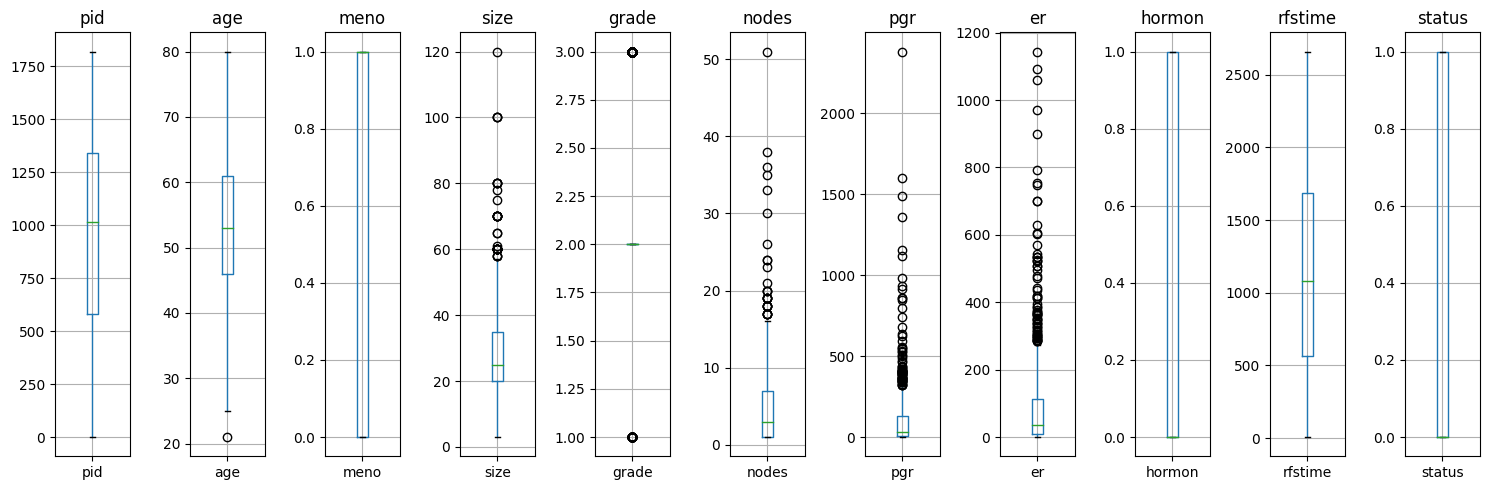

In [ ]:
columns = df.columns.tolist()
fig,ax = plt.subplots(1, len(columns),figsize=(15,5))

for i,col in enumerate(columns):
    df.boxplot(column=col, ax= ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()


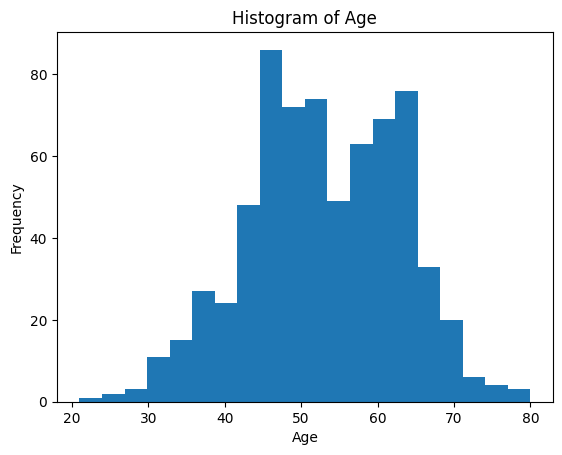

In [ ]:
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

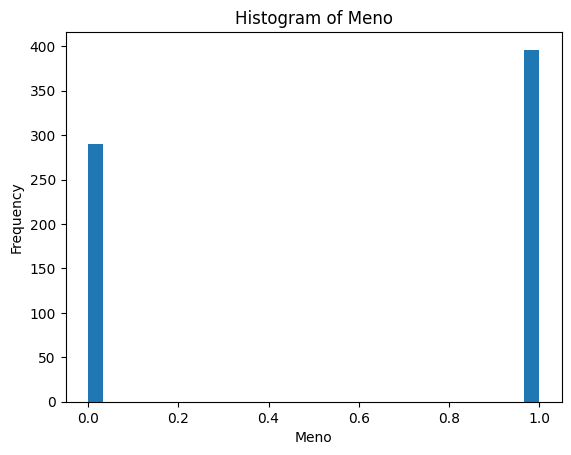

In [ ]:
plt.hist(df['meno'], bins=30)
plt.xlabel('Meno')
plt.ylabel('Frequency')
plt.title('Histogram of Meno')
plt.show()

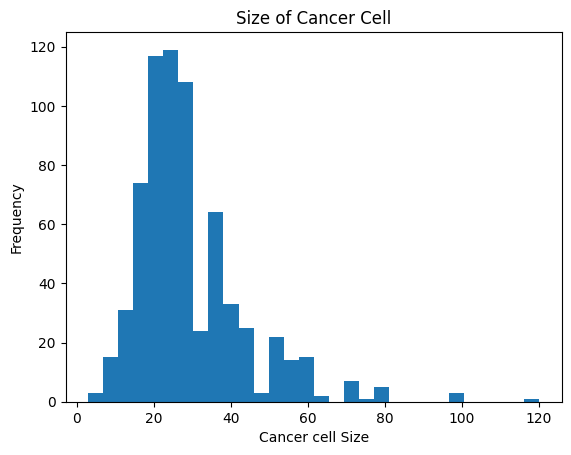

In [ ]:
plt.hist(df['size'], bins=30)
plt.xlabel('Cancer cell Size')
plt.ylabel('Frequency')
plt.title('Size of Cancer Cell')
plt.show()

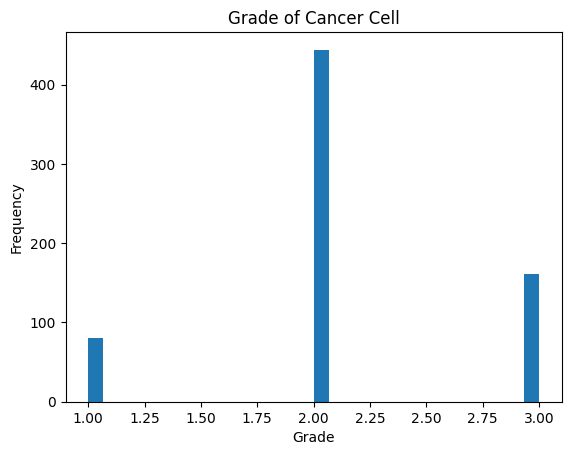

In [ ]:
plt.hist(df['grade'], bins=30)
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('Grade of Cancer Cell')
plt.show()

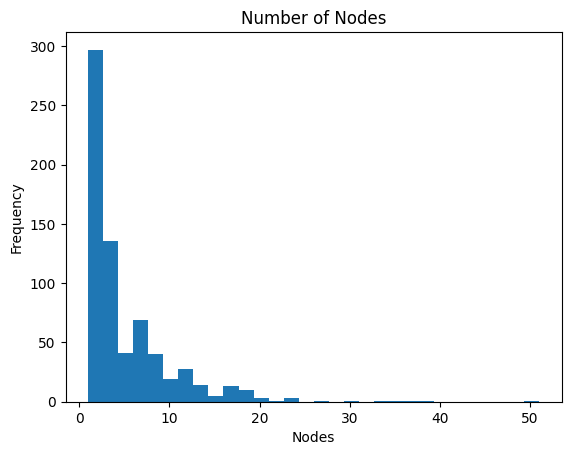

In [ ]:
plt.hist(df['nodes'], bins=30)
plt.xlabel('Nodes')
plt.ylabel('Frequency')
plt.title('Number of Nodes')
plt.show()

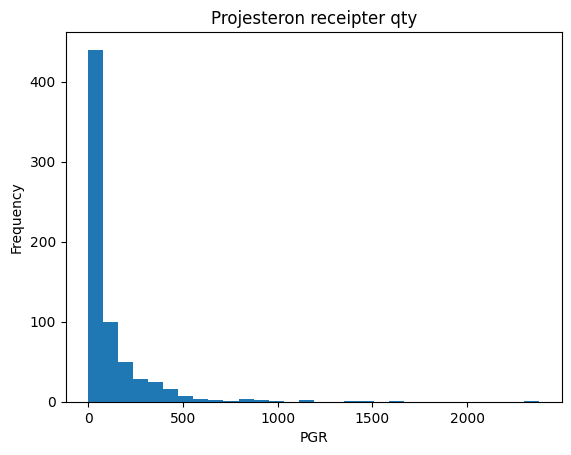

In [ ]:
plt.hist(df['pgr'], bins=30)
plt.xlabel('PGR')
plt.ylabel('Frequency')
plt.title('Projesteron receipter qty')
plt.show()

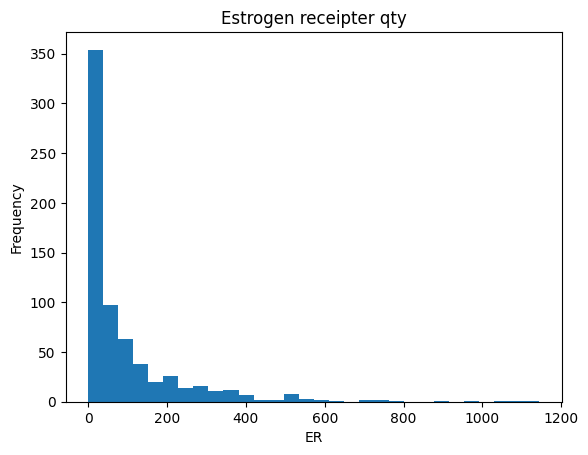

In [ ]:
plt.hist(df['er'], bins=30)
plt.xlabel('ER')
plt.ylabel('Frequency')
plt.title('Estrogen receipter qty')
plt.show()

<Axes: >

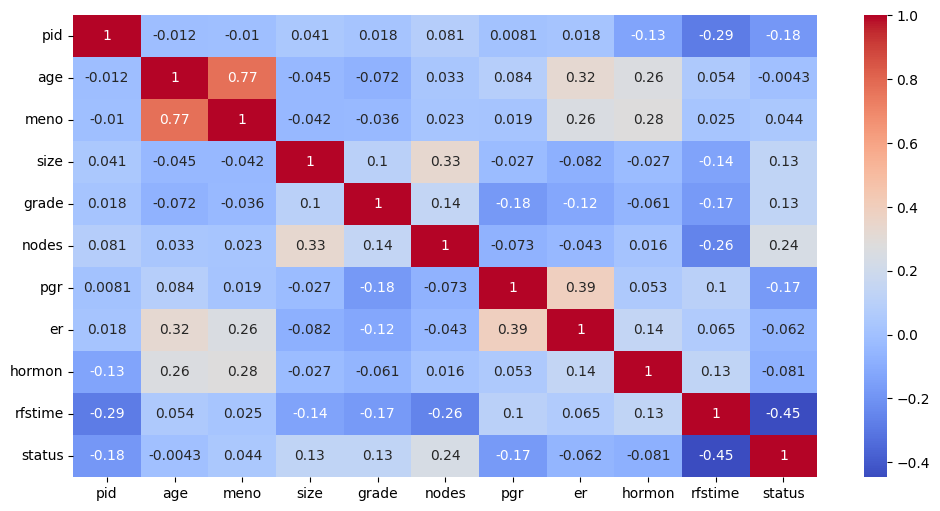

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')

In [ ]:
df.shape
# Seperate Features and Target Variable
X = df.iloc[:,0:10].values
y = df.iloc[:,[10]].values

In [ ]:
# Train & Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=24)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(548, 10)
(138, 10)
(548, 1)
(138, 1)


In [ ]:
# Feature Scaling
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

Logistic Regression

In [ ]:
lr_model = LogisticRegression(max_iter = 2500,verbose=0)
lr_model.fit(X_train_scaled,y_train)
y_preds_lr = lr_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
score = accuracy_score(y_test,y_preds_lr)
print(score)

0.7391304347826086


Random Forest Ensemble

In [ ]:
# Random Forest Classifier  -Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 800, max_depth = 10)
rf_model = rf.fit(X_train_scaled,y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
rf_score = accuracy_score(y_test,y_pred_rf)
print(f"Accuracy Score:{rf_score}")
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score is:{f1_rf}")

Accuracy Score:0.7318840579710145
F1 Score is:0.7267387915460106


Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model = gb.fit(X_train_scaled,y_train)
y_pred_gb = gb_model.predict(X_test_scaled)
gb_score = accuracy_score(y_test,y_pred_gb)
print(f"Accuracy Score:{gb_score}")
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
print(f"F1 Score:{f1_gb}")

Accuracy Score:0.7608695652173914
F1 Score:0.7552254928436403


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_model = dt.fit(X_train_scaled,y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_score = accuracy_score(y_test,y_pred_dt)
print(f"Accuracy Score:{dt_score}")
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 Score:{f1_dt}")

Accuracy Score:0.782608695652174
F1 Score:0.782608695652174


In [ ]:
report = classification_report(y_test,y_pred_dt)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        71
           1       0.78      0.78      0.78        67

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138



Text(0.5, 1.0, 'Confusion Matrix Decision Tree')

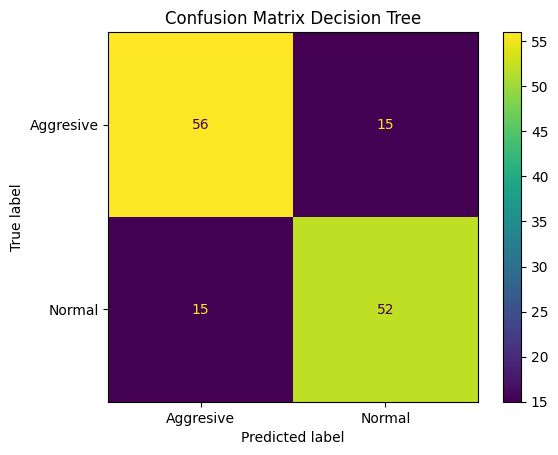

In [ ]:
classes = ['Aggresive','Normal']
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt,display_labels = classes)
plt.rcParams['figure.figsize'] = [6,6]
plt.title("Confusion Matrix Decision Tree")

ROC

auc_score is:0.8364515450914441


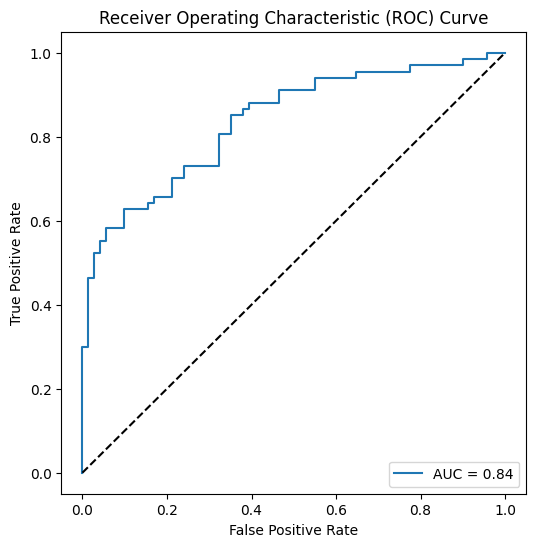

In [ ]:
from sklearn.metrics import roc_curve
# Get predicted probabilities for the positive class
y_pred_prob = gb_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC Score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f"auc_score is:{auc_score}")

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

DNN

In [ ]:
df["status"].unique()

array([0, 1])

In [ ]:
df["status"].value_counts()

0    387
1    299
Name: status, dtype: int64

In [ ]:
df["status"].value_counts()

0    387
1    299
Name: status, dtype: int64

array([[<Axes: title={'center': 'pid'}>, <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'meno'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'nodes'}>],
       [<Axes: title={'center': 'pgr'}>, <Axes: title={'center': 'er'}>,
        <Axes: title={'center': 'hormon'}>],
       [<Axes: title={'center': 'rfstime'}>,
        <Axes: title={'center': 'status'}>, <Axes: >]], dtype=object)

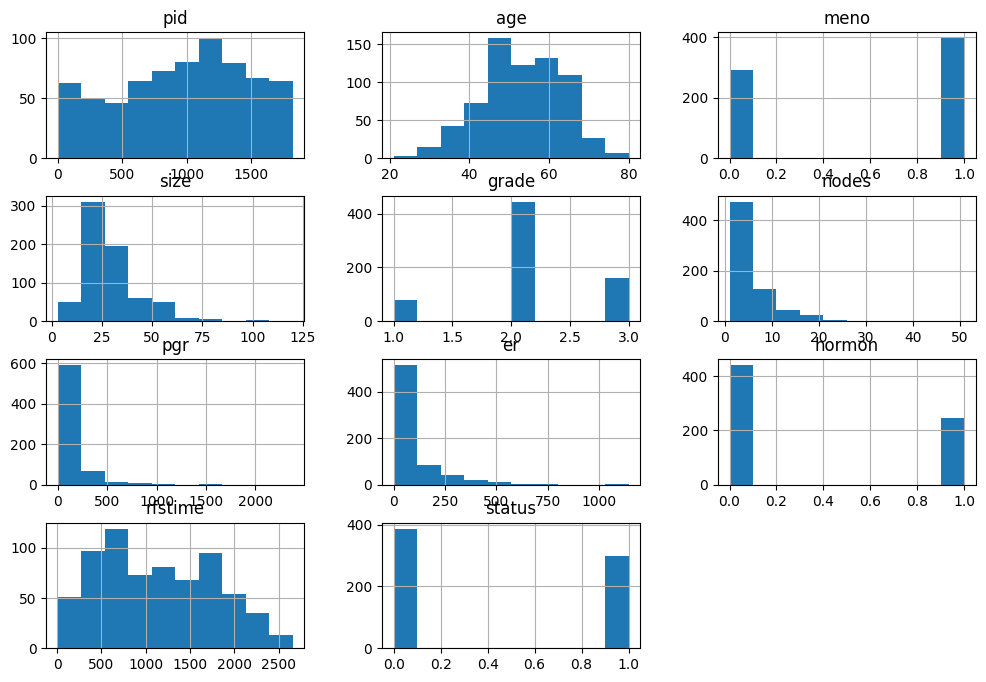

In [ ]:
df.hist(figsize=(12,8))

In [ ]:
data = df

In [ ]:
X = data.drop("status", axis=1)
y = data["status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(548, 10)

In [ ]:
X_train[:5]

array([[-0.09727543,  1.30447609,  0.87946733,  0.76065796,  1.49907986,
         1.95844143, -0.43528951,  2.11844641, -0.74620251, -0.27830648],
       [ 1.44866781,  0.12792489,  0.87946733, -0.09308615,  1.49907986,
        -0.17804013, -0.53664867, -0.63191786, -0.74620251, -0.7676513 ],
       [-0.78190743, -0.46035071, -1.1370519 , -0.66224889,  1.49907986,
         0.35608026, -0.54171662, -0.64533427, -0.74620251, -0.53455645],
       [ 0.10751186,  1.79470576,  0.87946733, -0.59110355, -0.21594261,
         0.71216052, -0.54171662, -0.64533427,  1.34011879, -1.45304277],
       [-0.04708246, -0.06816697,  0.87946733,  0.40493125, -0.21594261,
         2.84864208, -0.48596909, -0.26296655,  1.34011879, -0.41106249]])

In [ ]:
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dropout(0.50),
  tf.keras.layers.Dense(56, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

model_history = model.fit(X_train,
                                y_train,
                                epochs=100,
                                validation_data=(X_test, y_test),
                                callbacks=[early_stopping])

Epoch 1/100
18/18 [==============================] - 8s 18ms/step - loss: 0.6570 - accuracy: 0.6168 - val_loss: 0.6242 - val_accuracy: 0.6449
Epoch 2/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5834 - accuracy: 0.7080 - val_loss: 0.5570 - val_accuracy: 0.7101
Epoch 3/100
18/18 [==============================] - 0s 6ms/step - loss: 0.5598 - accuracy: 0.7208 - val_loss: 0.5361 - val_accuracy: 0.7391
Epoch 4/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5254 - accuracy: 0.7464 - val_loss: 0.5130 - val_accuracy: 0.7319
Epoch 5/100
18/18 [==============================] - 0s 7ms/step - loss: 0.5086 - accuracy: 0.7591 - val_loss: 0.5044 - val_accuracy: 0.7536
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 0.4951 - accuracy: 0.7628 - val_loss: 0.4979 - val_accuracy: 0.7681
Epoch 7/100
18/18 [==============================] - 0s 7ms/step - loss: 0.4916 - accuracy: 0.7591 - val_loss: 0.4873 - val_accuracy: 0.7971
Epoch 8/100


<Axes: >

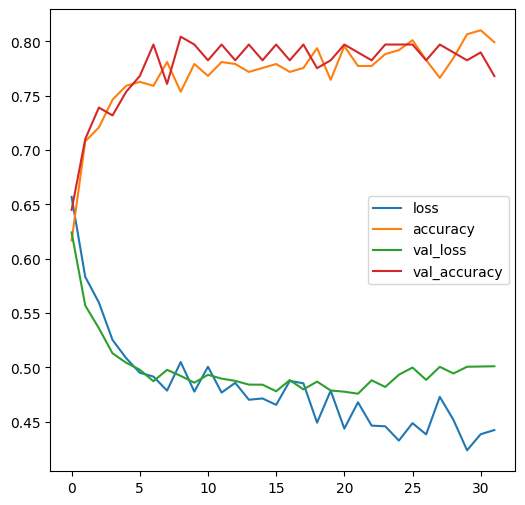

In [ ]:
pd.DataFrame(model_history.history).plot()

In [ ]:
model.evaluate(X_test,y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7899


[0.4758516848087311, 0.7898550629615784]

In [ ]:
y_pred_nn = model.predict(X_test)

5/5 [==============================] - 0s 2ms/step


In [ ]:
y_pred_nn[:5]

array([[0.17651458],
       [0.46269354],
       [0.5703249 ],
       [0.11802483],
       [0.46069467]], dtype=float32)

In [ ]:
y_pred_nn = tf.round(y_pred_nn)

In [ ]:
y_pred_nn[:5]

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [ ]:
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Precision: 0.7971014492753623
Recall: 0.7857142857142857
F1 score: 0.7913669064748201


#Data Analysis

EDA with ML models

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [ ]:
df=pd.read_csv("/content/sample_data/gbsg.csv")
df

,Unnamed: 0,pid,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
0,1,132,49,0,18,2,2,0,0,0,1838,0
1,2,1575,55,1,20,3,16,0,0,0,403,1
2,3,1140,56,1,40,3,3,0,0,0,1603,0
3,4,769,45,0,25,3,1,0,4,0,177,0
4,5,130,65,1,30,2,5,0,36,1,1855,0
...,...,...,...,...,...,...,...,...,...,...,...,...
681,682,586,51,0,30,3,2,1152,38,1,1760,0
682,683,1273,64,1,26,2,2,1356,1144,1,1152,0
683,684,1525,57,1,35,3,1,1490,209,1,1342,0
684,685,736,44,0,21,2,3,1600,70,0,629,0


#Data analysis

Drop the columns that have unique values

In [ ]:
df=df.drop(['Unnamed: 0','pid'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   age      686 non-null    int64
 1   meno     686 non-null    int64
 2   size     686 non-null    int64
 3   grade    686 non-null    int64
 4   nodes    686 non-null    int64
 5   pgr      686 non-null    int64
 6   er       686 non-null    int64
 7   hormon   686 non-null    int64
 8   rfstime  686 non-null    int64
 9   status   686 non-null    int64
dtypes: int64(10)
memory usage: 53.7 KB


In [ ]:
df.describe()

,age,meno,size,grade,nodes,pgr,er,hormon,rfstime,status
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,53.052478,0.577259,29.329446,2.116618,5.010204,109.995627,96.252187,0.358601,1124.489796,0.435860
std,10.120739,0.494355,14.296217,0.582808,5.475483,202.331552,153.083963,0.479940,642.791948,0.496231
min,21.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,46.000000,0.000000,20.000000,2.000000,1.000000,7.000000,8.000000,0.000000,567.750000,0.000000
50%,53.000000,1.000000,25.000000,2.000000,3.000000,32.500000,36.000000,0.000000,1084.000000,0.000000
75%,61.000000,1.000000,35.000000,2.000000,7.000000,131.750000,114.000000,1.000000,1684.750000,1.000000
max,80.000000,1.000000,120.000000,3.000000,51.000000,2380.000000,1144.000000,1.000000,2659.000000,1.000000


In [ ]:
df.dtypes

age        int64
meno       int64
size       int64
grade      int64
nodes      int64
pgr        int64
er         int64
hormon     int64
rfstime    int64
status     int64
dtype: object

In [ ]:
#checking null values
df.isnull().sum()


age        0
meno       0
size       0
grade      0
nodes      0
pgr        0
er         0
hormon     0
rfstime    0
status     0
dtype: int64

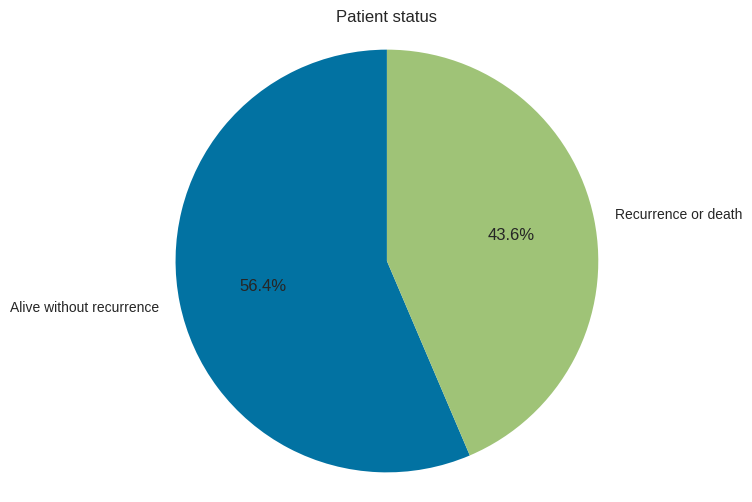

In [ ]:
plt.figure(figsize=(6,6))
status_counts=df['status'].value_counts()
labels=['Alive without recurrence','Recurrence or death']
plt.pie(status_counts,labels=labels,startangle=90,autopct='%.1f%%')
plt.title("Patient status")
plt.axis('equal')
plt.show()

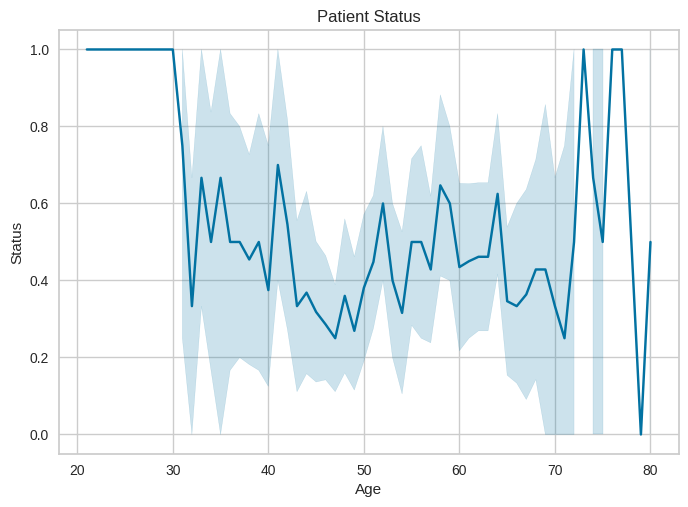

In [ ]:
sns.lineplot(x='age',y='status',data=df)
plt.title('Patient Status')
plt.xlabel('Age')
plt.ylabel("Status")
plt.show()

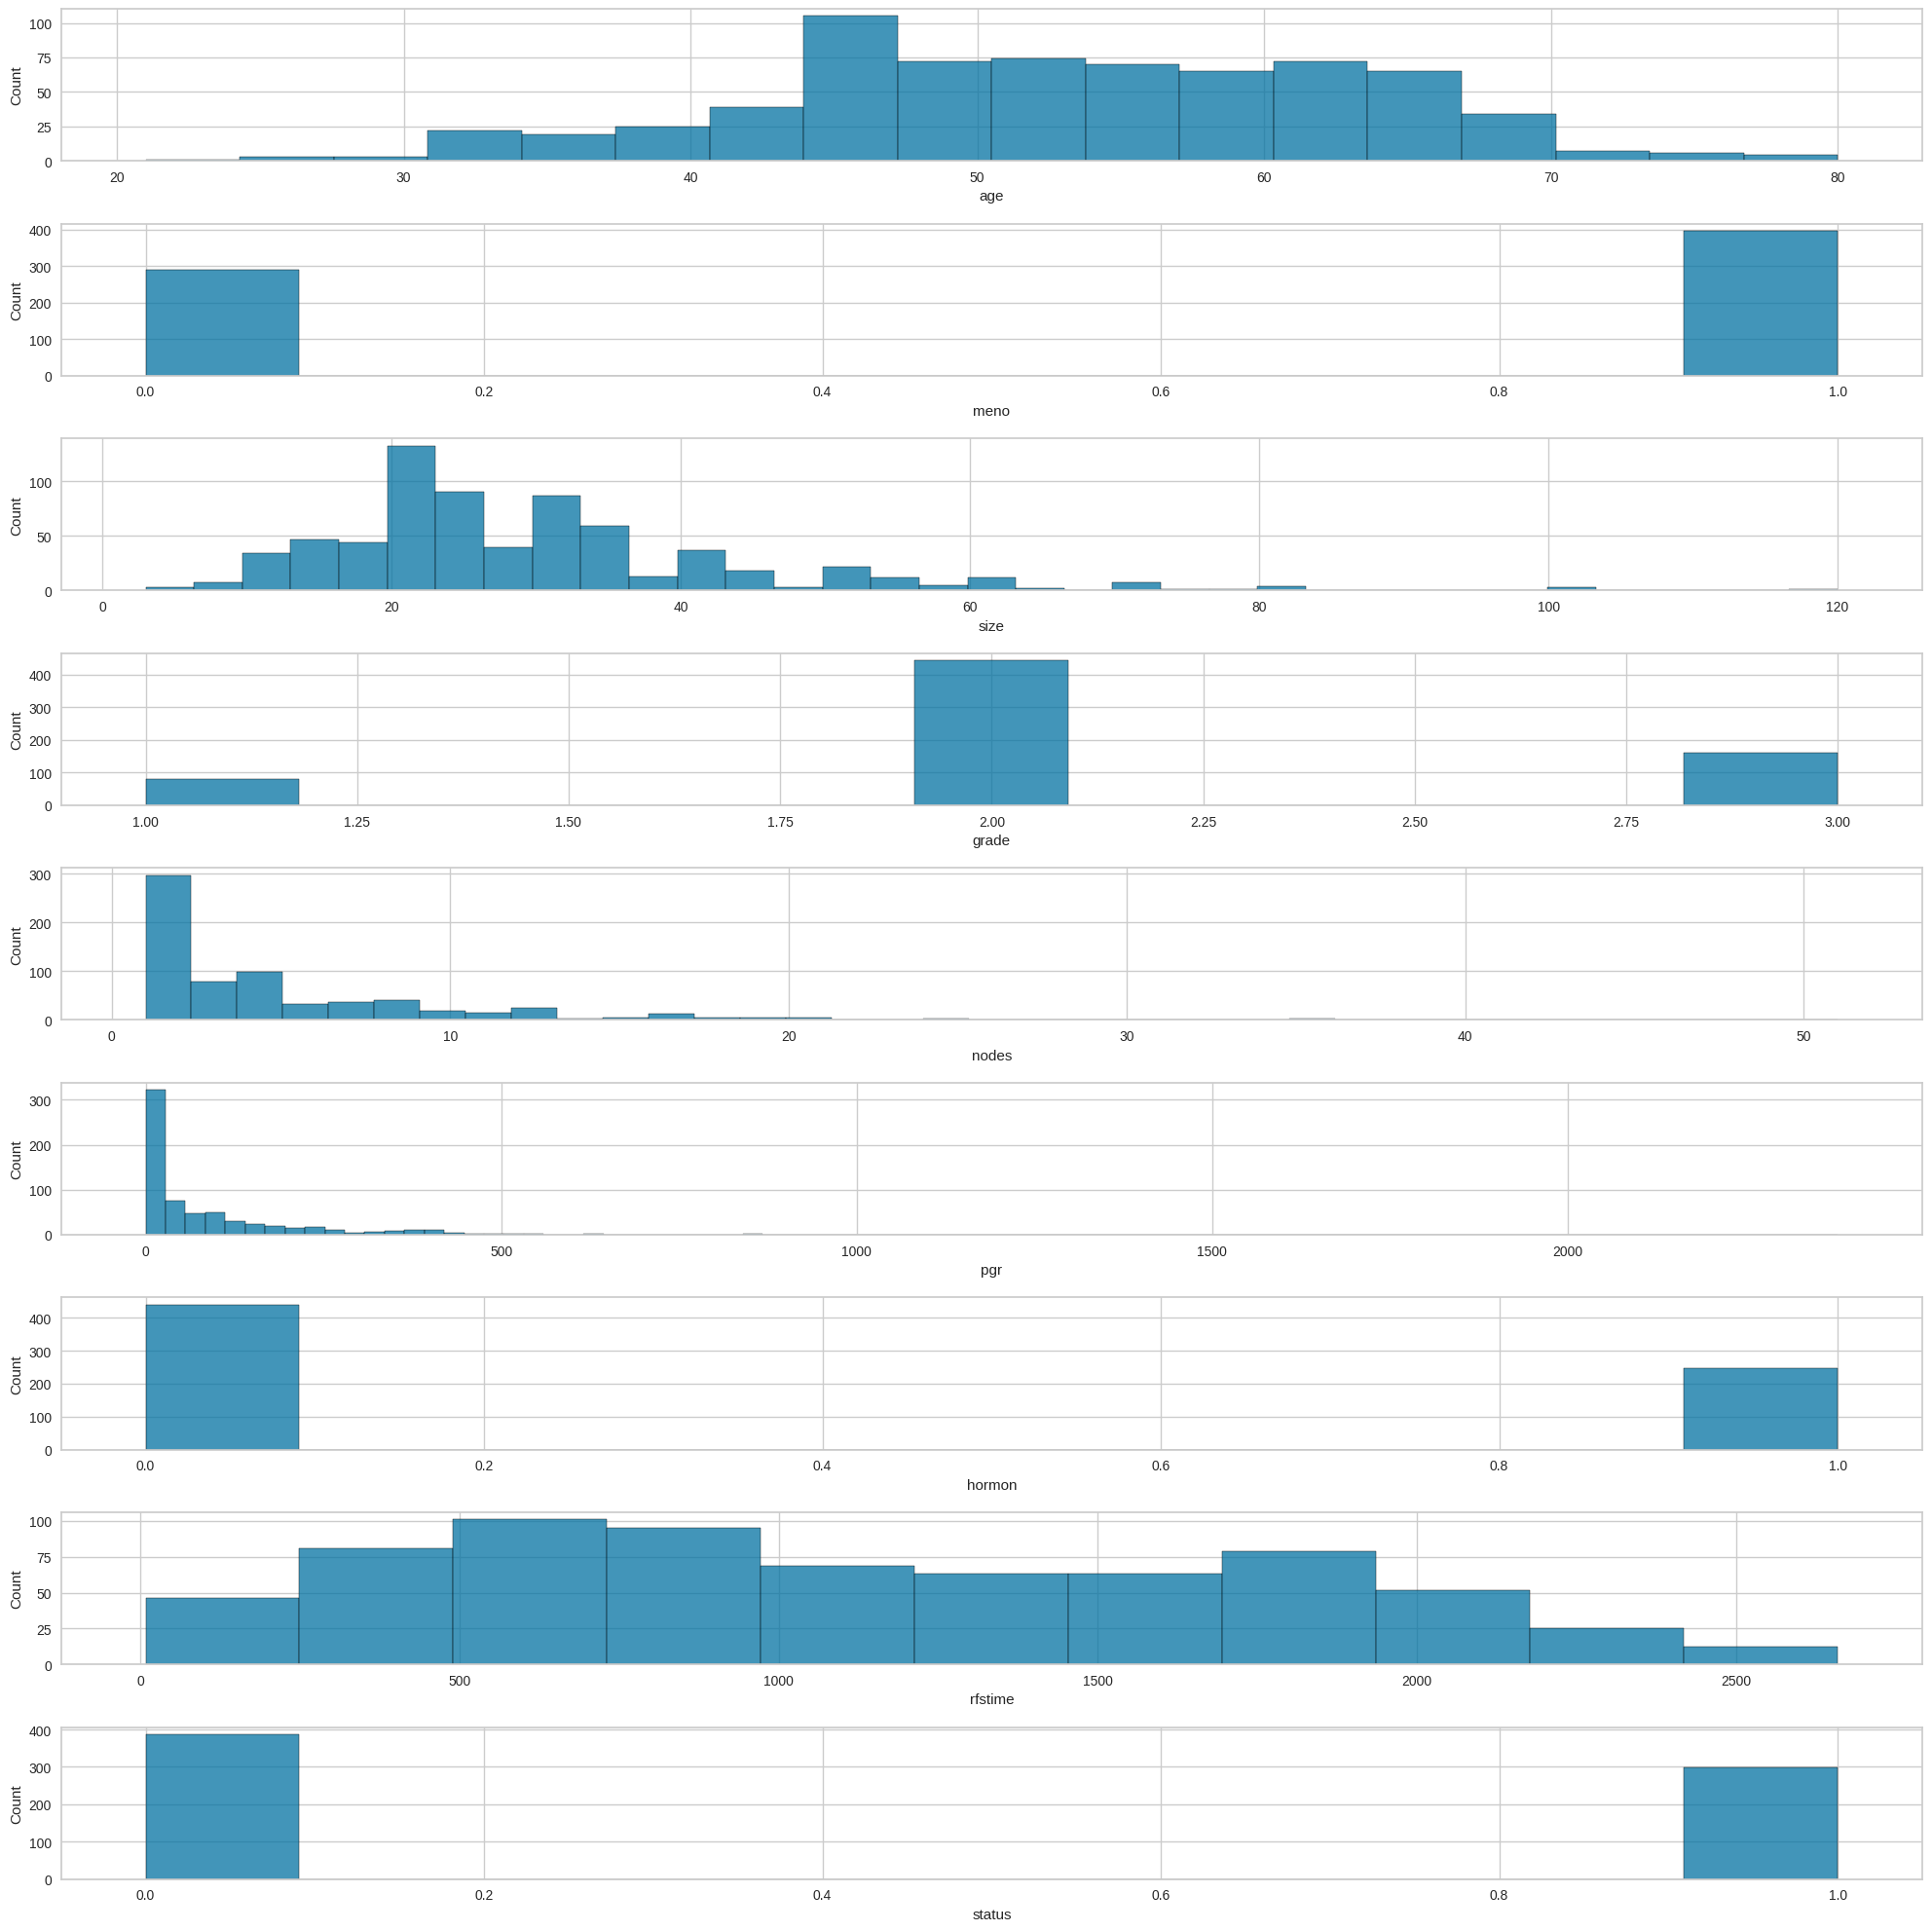

In [ ]:
def plot_hist(data,columns):
  fig,axes=plt.subplots(nrows=len(columns),ncols=1,figsize=(20,20))
  for i,col in enumerate(columns):
    sns.histplot(data[col],kde=False,ax=axes[i])
    axes[i].set_xlabel(col)
  plt.tight_layout()
  plt.show()

col=['age','meno','size','grade','nodes','pgr','hormon','rfstime','status']
plot_hist(df,col)

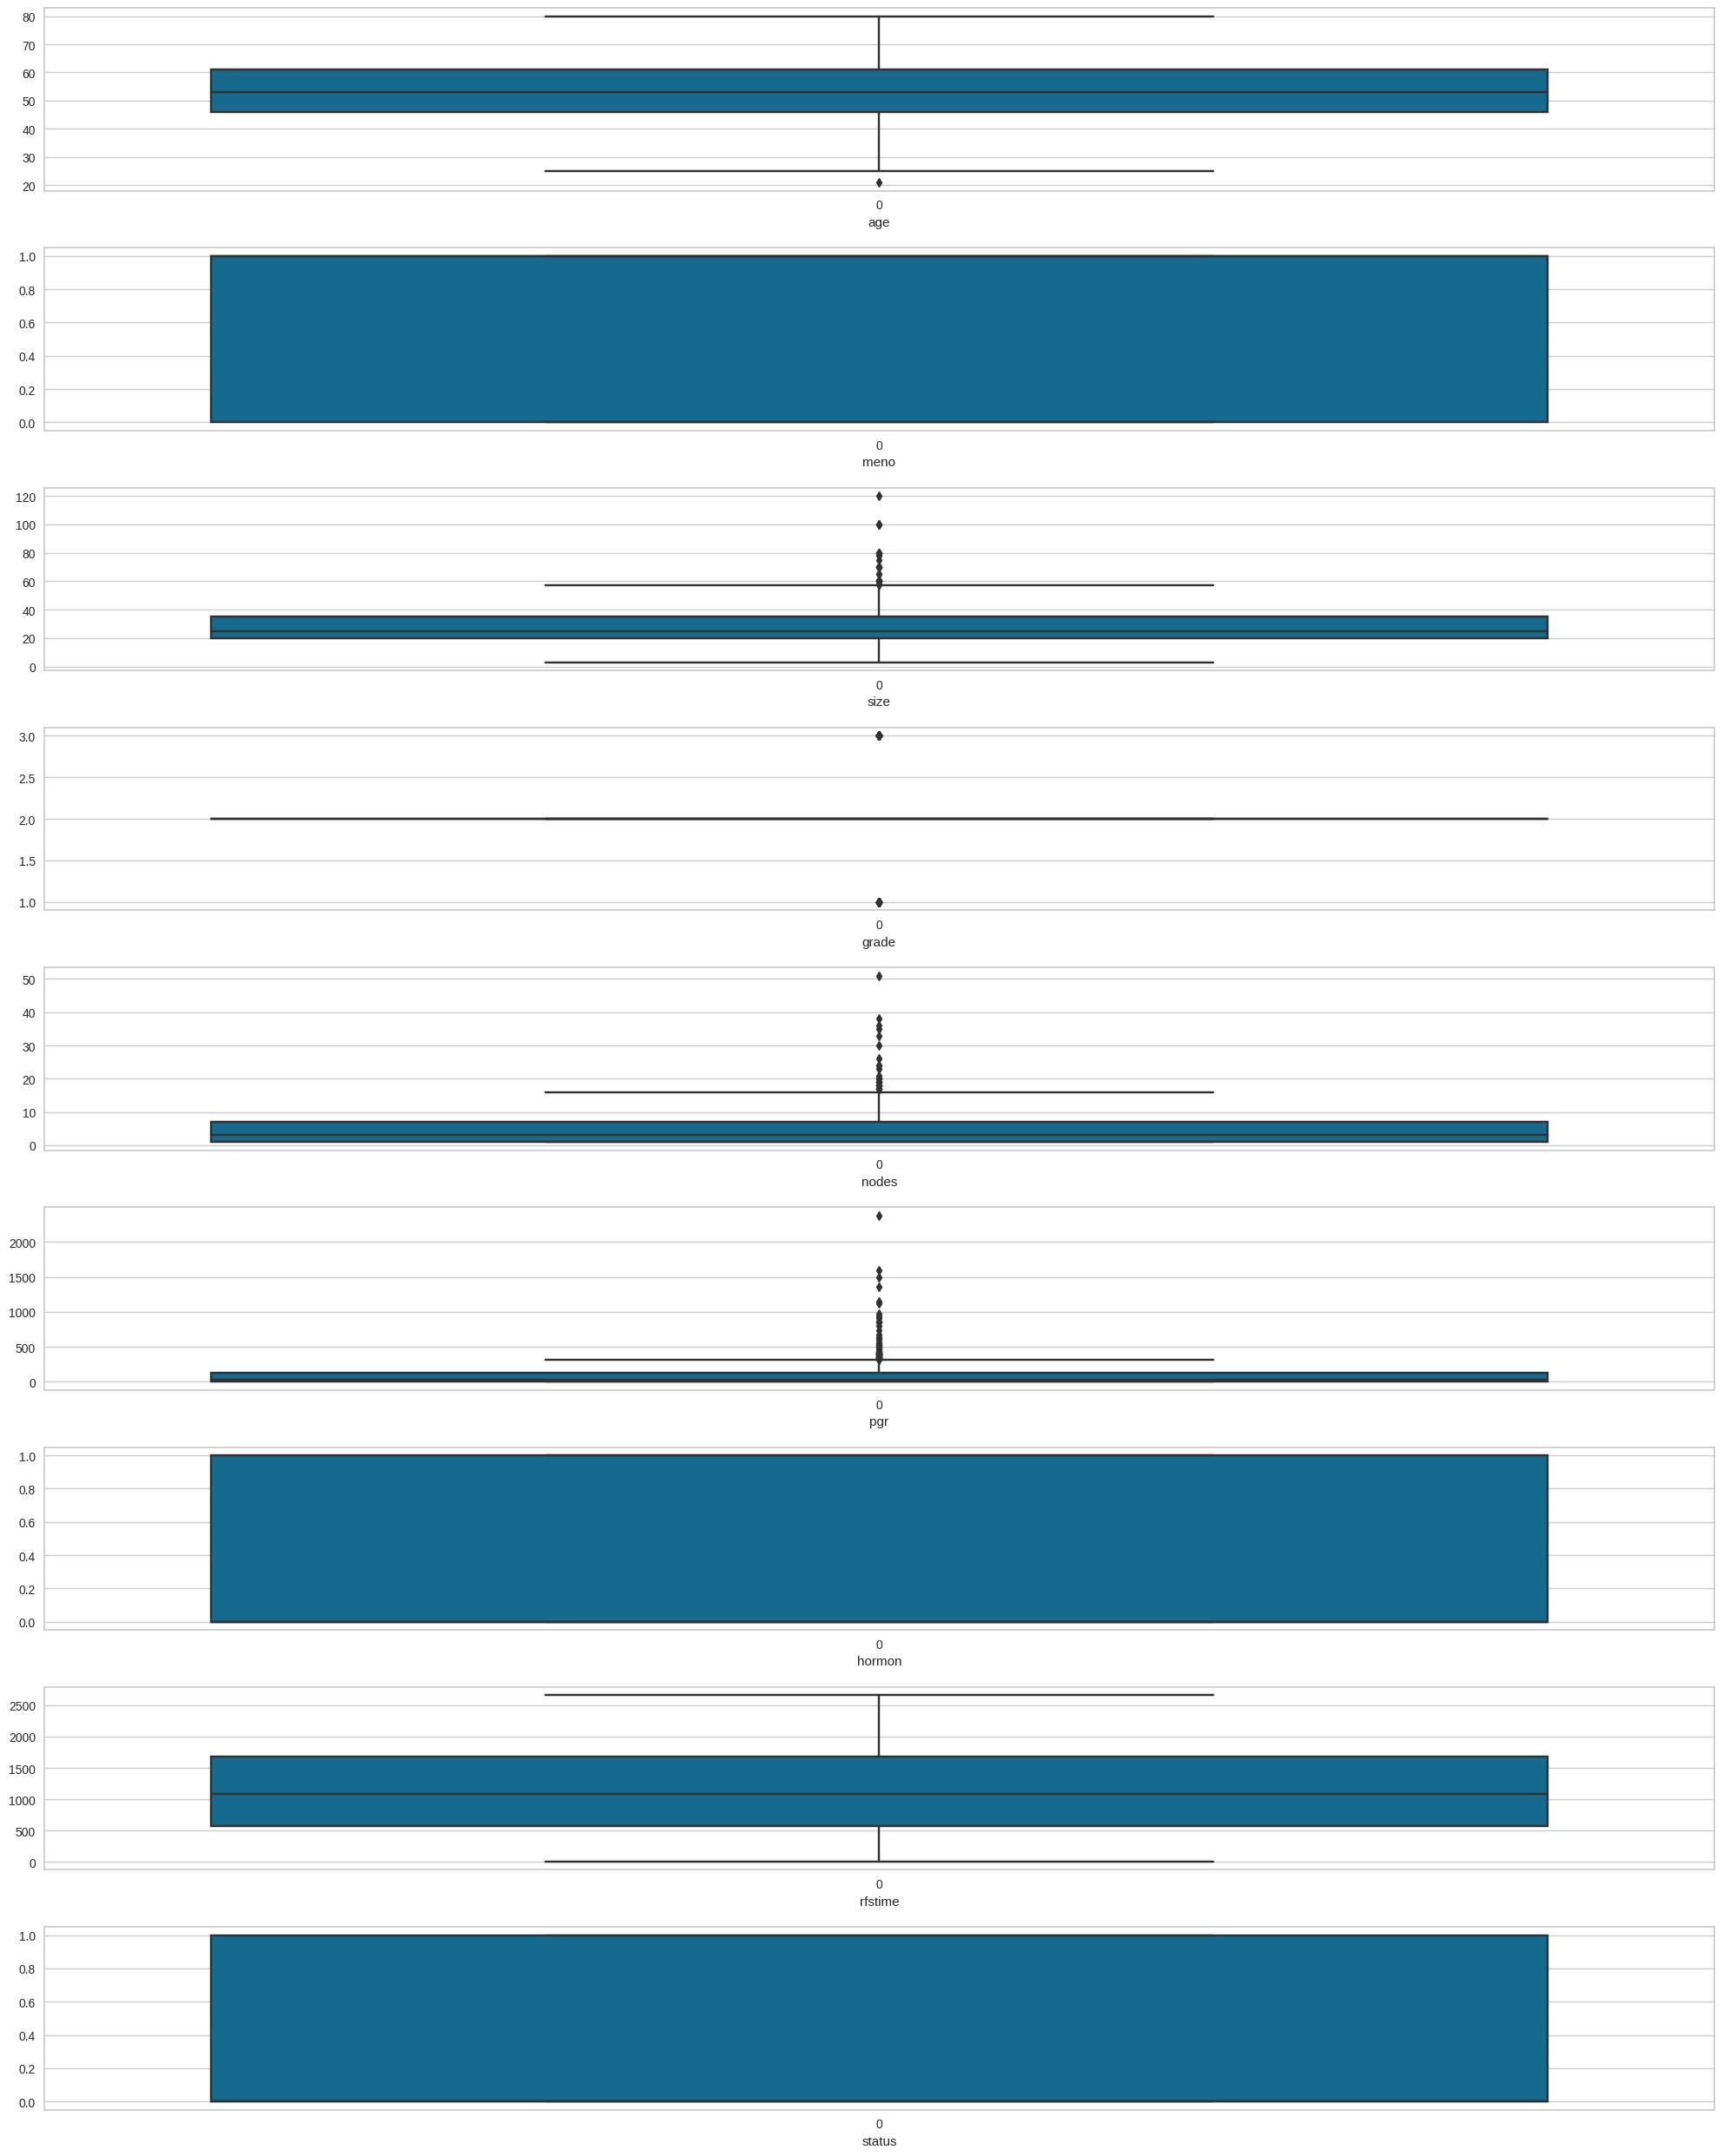

In [ ]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,25))
    for i, col in enumerate(columns):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

box_plot(df,col)

<Axes: >

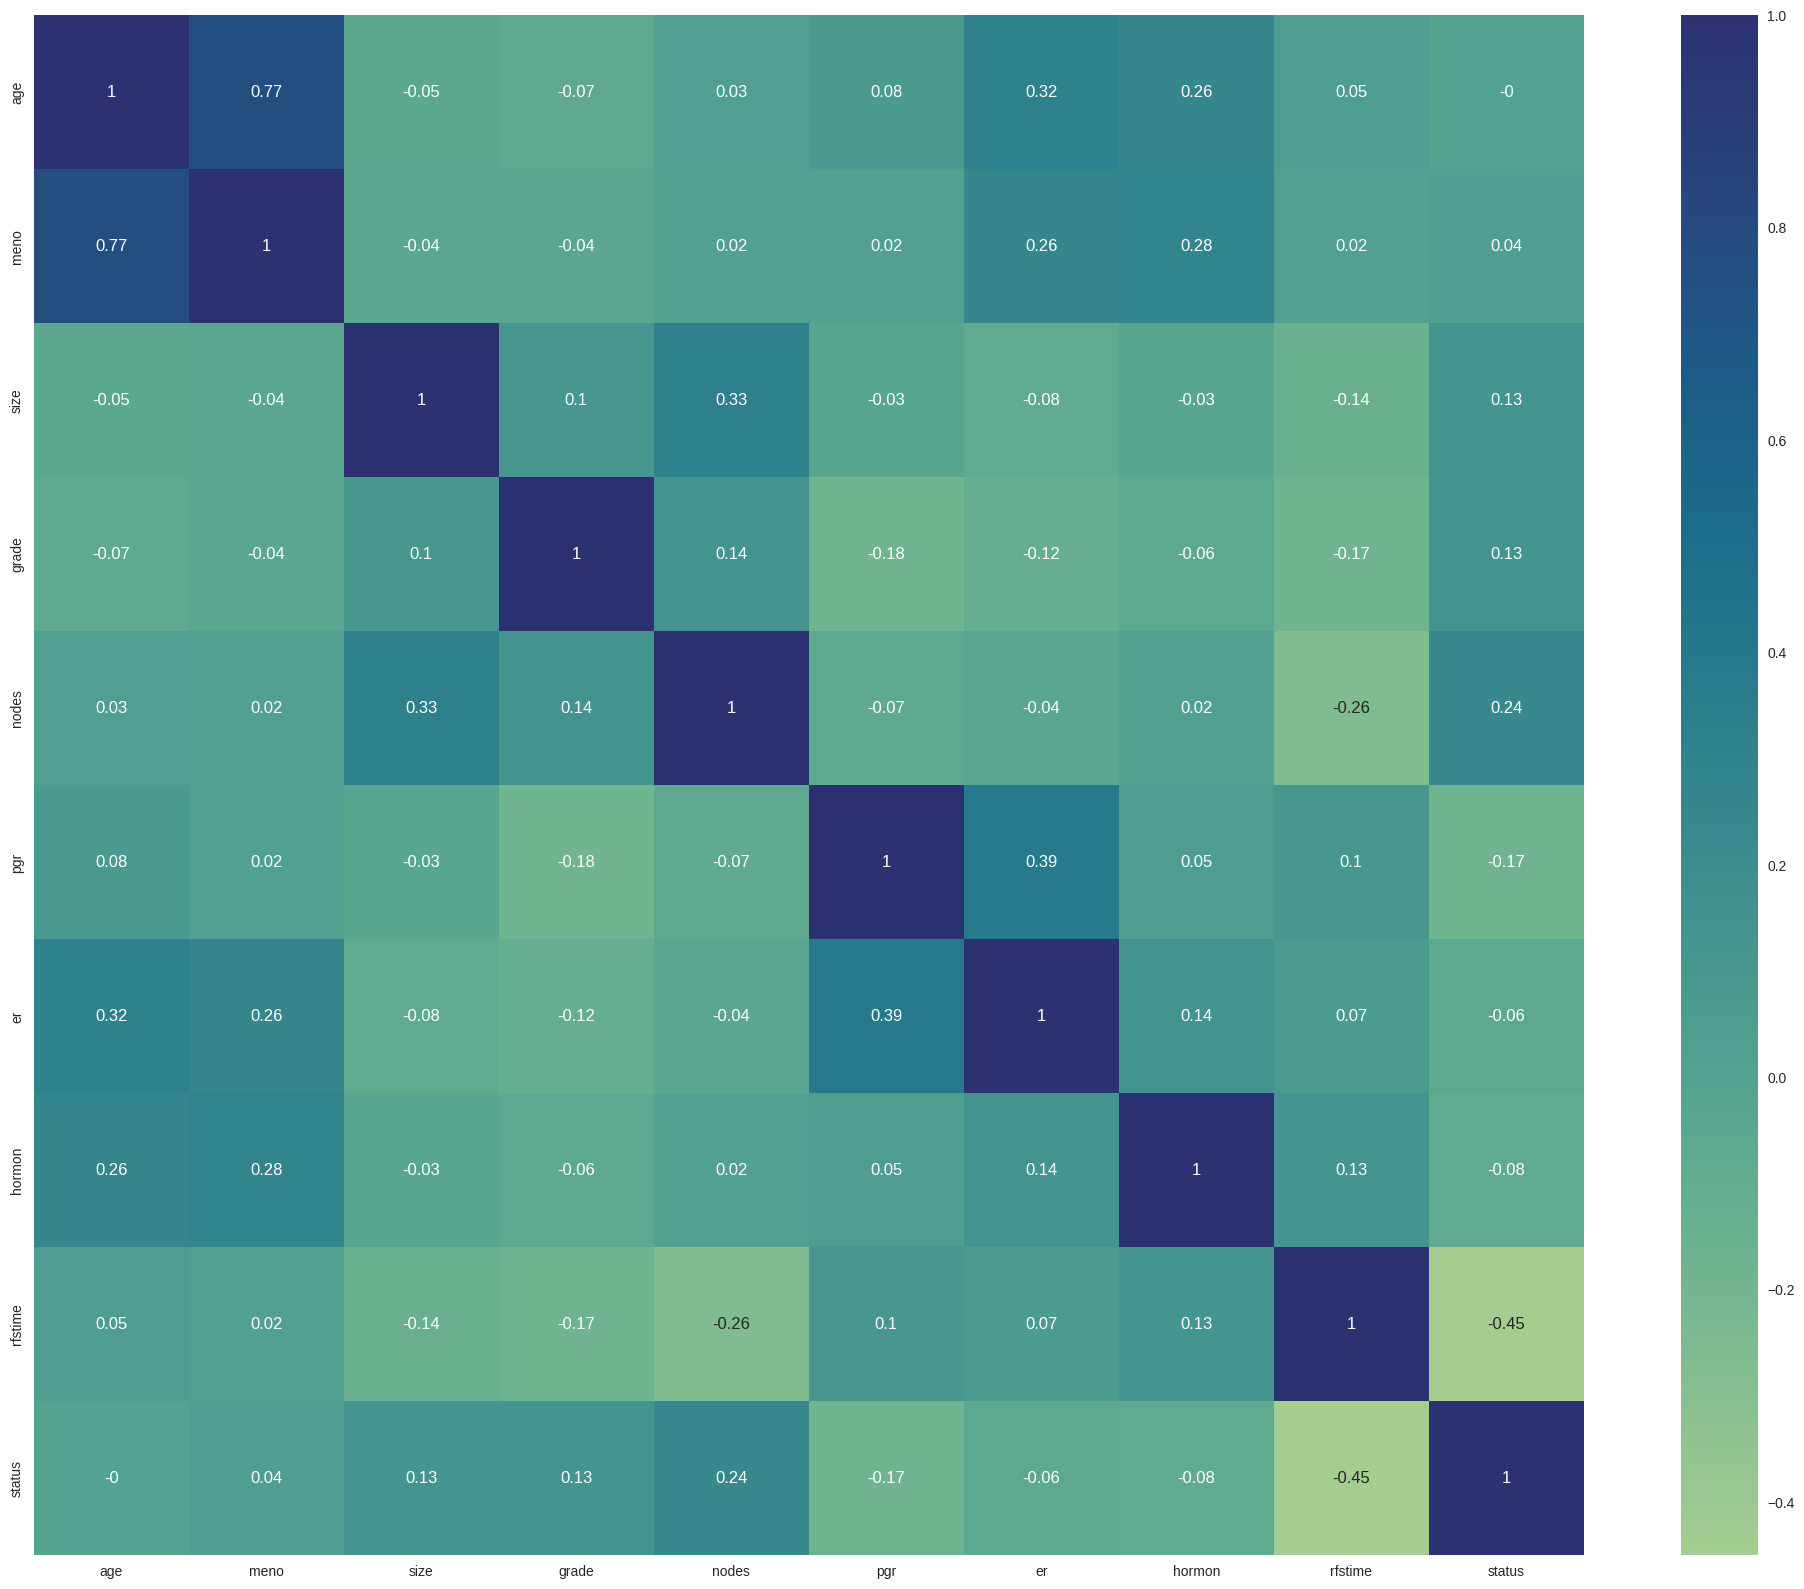

In [ ]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'crest')

Remove outliers

In [ ]:
df.shape

(686, 10)

In [ ]:
## Remove the outliers
def drop_outliers(data,feature):
    iqr=1.5 * (np.percentile(data[feature],90)-np.percentile(data[feature],10))
    data.drop(data[data[feature]> (iqr+np.percentile(data[feature],90))].index,inplace=True)
    data.drop(data[data[feature]< (np.percentile(data[feature],10)-iqr)].index,inplace=True)

In [ ]:
# apply outlier removal to each numeric feature
for feature in col:
    drop_outliers(df, feature)

In [ ]:
df.shape

(666, 10)

In [ ]:
X=df.drop('status',axis=1)
X=X.values
y=df['status']
X

array([[  49,    0,   18, ...,    0,    0, 1838],
       [  55,    1,   20, ...,    0,    0,  403],
       [  56,    1,   40, ...,    0,    0, 1603],
       ...,
       [  51,    1,    4, ...,  232,    1,  461],
       [  46,    1,   20, ...,  152,    0, 1814],
       [  59,    1,   45, ...,  526,    0,  740]])

Spliting the data

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape,y_train.shape

((532, 9), (532,))

In [ ]:
X_test.shape,y_test.shape

((134, 9), (134,))

#Normalization

ScandardScale is used to put the data into same scale

In [ ]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit(X_test)
X_train_std

array([[-1.47337707, -1.15470054, -0.43547709, ..., -0.62055221,
        -0.74230749,  0.92100953],
       [-0.37946656, -1.15470054, -0.66365222, ...,  0.0682872 ,
         1.34715063,  1.3494409 ],
       [ 0.41610472,  0.8660254 ,  1.61809906, ..., -0.31356943,
        -0.74230749, -1.58378389],
       ...,
       [ 1.01278317,  0.8660254 ,  1.23780718, ...,  0.03085028,
        -0.74230749, -1.2670507 ],
       [-0.37946656,  0.8660254 , -0.58759385, ...,  0.47260599,
        -0.74230749,  0.91335897],
       [ 0.91333676,  0.8660254 ,  1.61809906, ..., -0.65050175,
         1.34715063, -1.15688263]])

Model Selection

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

Hyper-parameter tunning

In [ ]:
lr=LogisticRegression(random_state=42)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier(eval_metric='logloss',use_label_encoder=False)

# parameter for KNN
para_knn={'n_neighbors':np.arange(1,50)}
grid_knn=GridSearchCV(knn,param_grid=para_knn,cv=5)

#parameter for decision tree
para_dt={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),
         'min_samples_leaf':[1,2,4,5,10,20,30,40,50,80,100]}
grid_dt=GridSearchCV(dt,param_grid=para_dt,cv=5)

#parameter for Random Forest
params_rf={'n_estimators':[100,200,350,500],
           'min_samples_leaf':[2,10,30,50,80,100]}
grid_rf=GridSearchCV(rf,param_grid=params_rf,cv=5)

#parameters for AdaBoost
params_ada={'n_estimators':[50,100,250,400,500],
            'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
grid_ada=GridSearchCV(ada,param_grid=params_ada,cv=5)

# paraameter for XGBoost
params_xgb={'n_estimators':[50,100,250,600,800,1000],
           'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
rs_xgb=RandomizedSearchCV(xgb,param_distributions=params_xgb,cv=5)

Finding the best parameters

In [ ]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

Best parameters for KNN: {'n_neighbors': 16}
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 350}
Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 500}
Best parameters for XGBoost: {'n_estimators': 250, 'learning_rate': 0.1}


Applying these in our models

In [ ]:
lr=LogisticRegression(random_state=42)
dt=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_leaf=5,random_state=42)
knn=KNeighborsClassifier(n_neighbors=16)
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=2,random_state=42)
ada=AdaBoostClassifier(n_estimators=500,learning_rate=0.1)
xgb=XGBClassifier(n_estimators=800,learning_rate=0.1)

In [ ]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('XGBoost', xgb)]

In [ ]:
from sklearn.metrics import accuracy_score
for classifier_name , classifier in classifiers:
    #Fit classifier to training set
    classifier.fit(X_train,y_train)

    #predict y_pred
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)

    #Evaluation the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

Logistic Regression : 0.73
K Nearest Neighbours : 0.77
Decision Tree : 0.76
Random Forest : 0.79
AdaBoost : 0.76
XGBoost : 0.70


We can see from the accuracy score that the most predicted accuracy score is 79% which we can find in Random Forest Classifier model

In [ ]:
def print_classifier_reports(classifiers, X_train, y_train, X_test, y_test):
    for name, clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Classification report for {name}:")
        print(classification_report(y_test, y_pred))

print_classifier_reports(classifiers, X_train, y_train, X_test, y_test)

Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        71
           1       0.75      0.65      0.69        63

    accuracy                           0.73       134
   macro avg       0.73      0.73      0.73       134
weighted avg       0.73      0.73      0.73       134

Classification report for K Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        71
           1       0.88      0.59      0.70        63

    accuracy                           0.77       134
   macro avg       0.80      0.76      0.76       134
weighted avg       0.79      0.77      0.76       134

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.72      0.90      0.80        71
           1       0.84      0.60      0.70        63

    accuracy                           0.76   

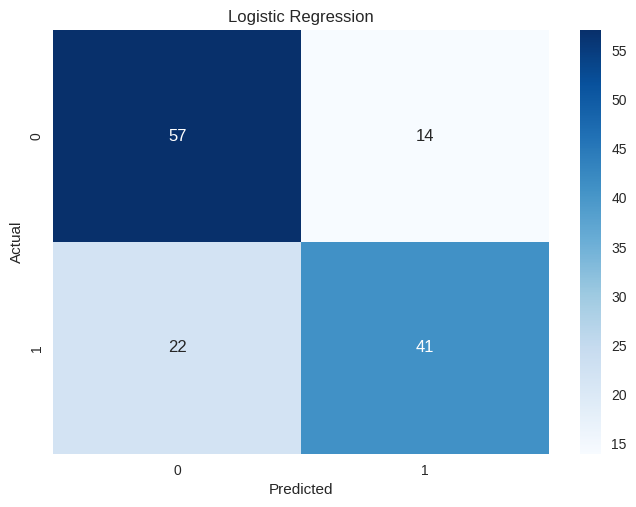

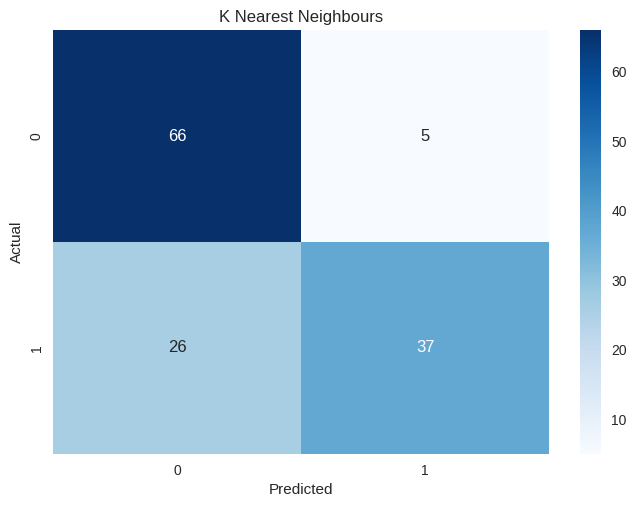

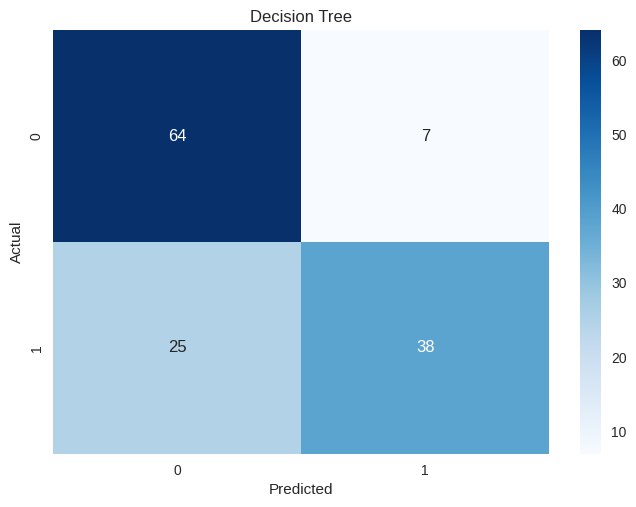

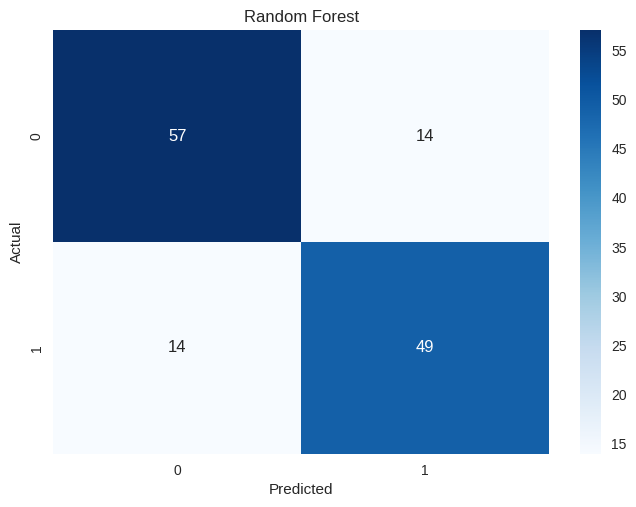

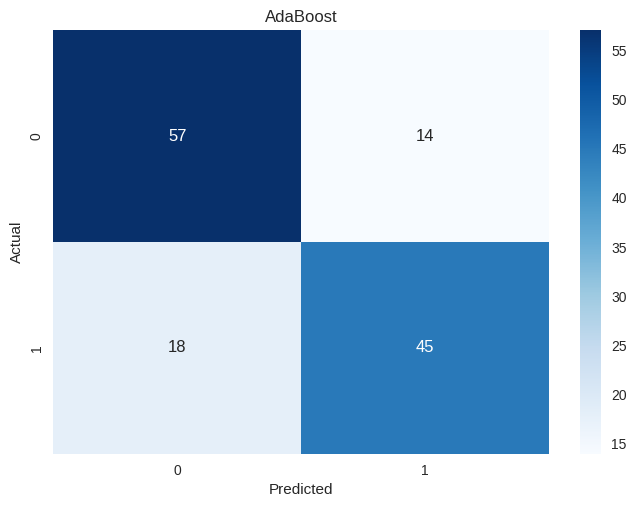

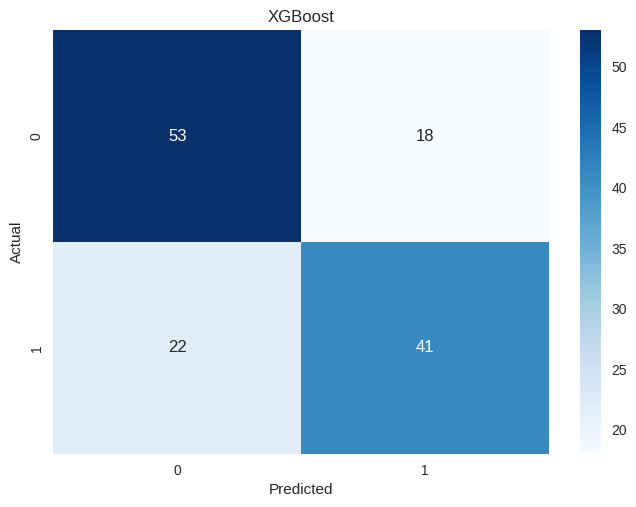

In [ ]:
def print_confusion_matrix(classifiers, X_train, y_train, X_test, y_test):
    for name, clf in classifiers:
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      cm=confusion_matrix(y_test,y_pred)
      ax = plt.subplot()
      sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')
      ax.set_title(name)
      plt.show()

print_confusion_matrix(classifiers, X_train, y_train, X_test, y_test)